CLUSTERING - K means

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv(r"D:\working\Supervised and Unsupervised learning\unsupervised\clustering\cluster_data.csv")

In [13]:
df.head()

,Feature 1,Feature 2
0,2.698582,-0.672960
1,-0.128113,4.355952
2,2.509049,5.773146
3,-1.518276,3.444886
4,-0.072283,2.883769


In [32]:
def k_means(data, k, max_iters=100):
    # Convert DataFrame to NumPy array
    data_array = data.to_numpy()
    
    # Randomly initialize centroids
    np.random.seed(42)  # For reproducibility
    centroids = data_array[np.random.choice(data_array.shape[0], k, replace=False)]
    
    for i in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(data_array[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([data_array[clusters == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids
k = 2

# Run K-means
clusters, centroids = k_means(df, k)


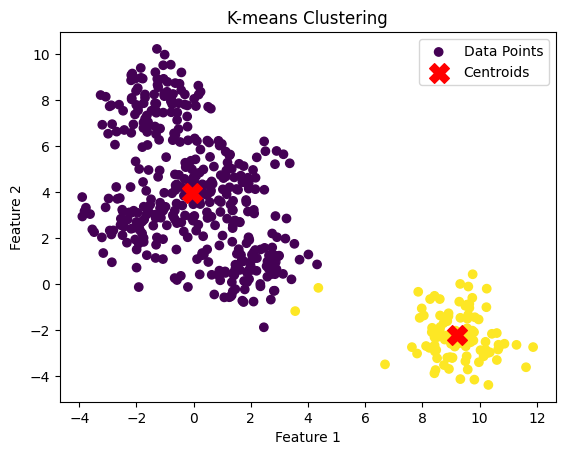

In [29]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
